# Animating Classification Performance Metrics

*Note: This notebook was created to explore how classification metrics could be communicated visually. Ultimately, Matplotlib was found to be too limited for the approach I had in mind, and this approach was abandoned.*
___

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import numpy as np
%matplotlib inline

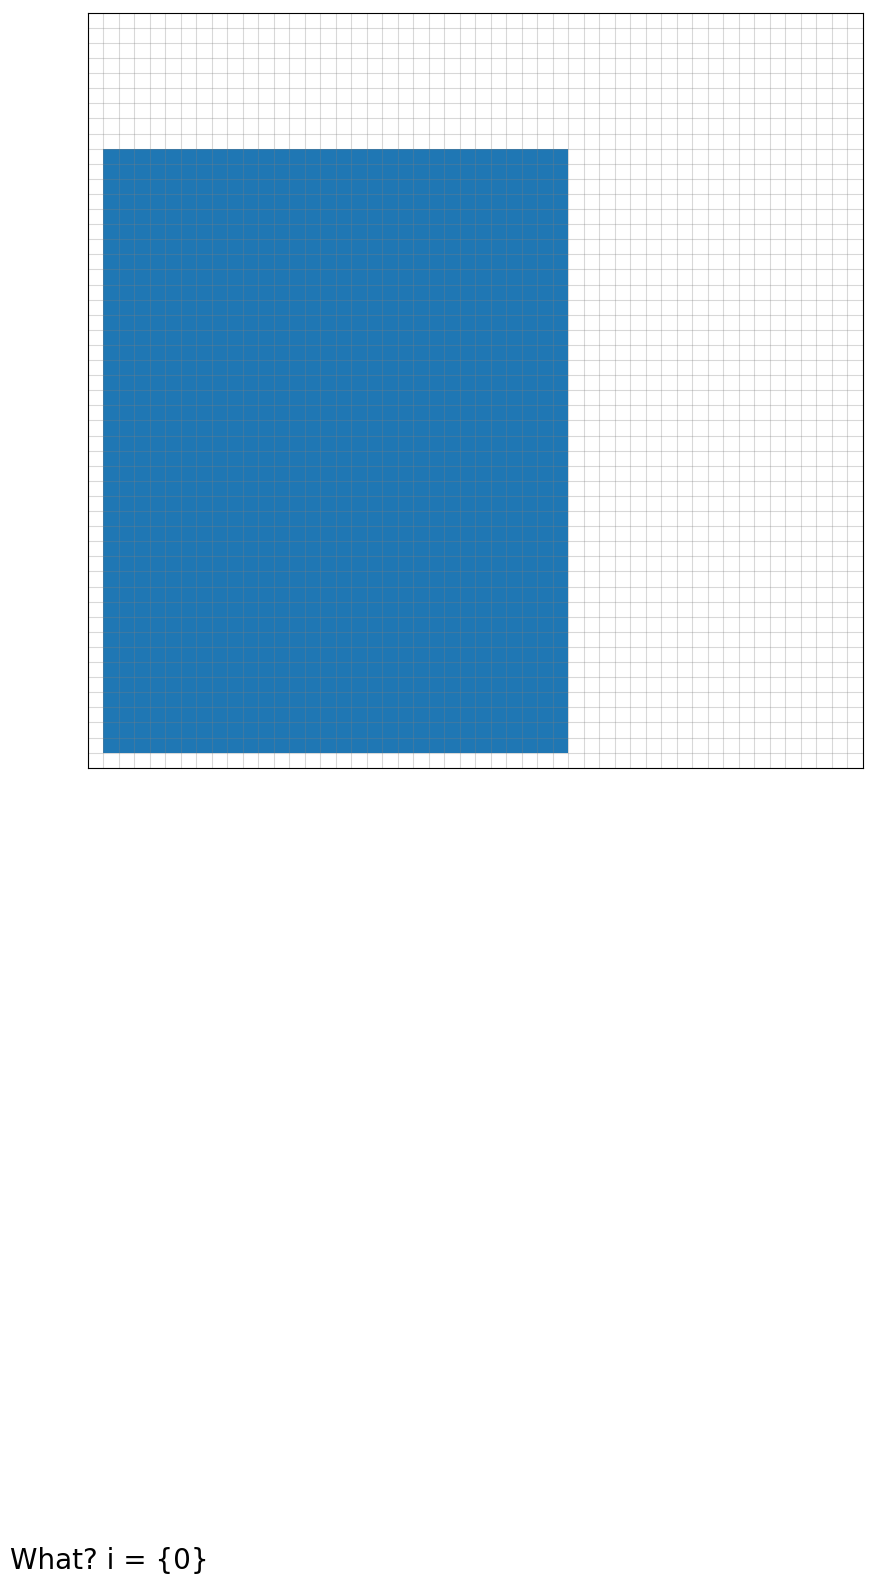

In [54]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(10,10)

# Prepare and pretty-up the graph.
ax = plt.gca()
plt.grid(color=(.5, .5, .5), alpha=0.3)
plt.xlim(0, 50)
plt.ylim(0, 50)
ax.set_xticks(np.arange(0, 50, 1))
ax.set_yticks(np.arange(0, 50, 1))
ax.tick_params(
    axis="both",
    bottom="off",
    left="off",
    labelbottom="off",
    labelleft="off"
)

# Set up any objects that will change.
rect = patches.Rectangle(xy=(-20, -20), width=10, height=10,
                        facecolor='none', edgecolor='black', linewidth=5)
ax.add_patch(patches.Rectangle(xy=(1, 1), width=30, height=40))
text_comment = ax.text(-5, -53, r"What? i = {0}")
text_comment.set_fontsize(20)
                       
def init():
    ax.add_patch(rect)
    return rect, text_comment
    
def animate(i):
    text_comment.set_position((20, 20))
    text_comment.set_text("Value is i = {0}".format(i))
    x, y = rect.xy
    #print("x = {}".format(x))
    #print("y = {}".format(y))
    x += 1
    y += 1
    rect.set_xy((x, y))
    return rect, text_comment

anim = FuncAnimation(fig, animate,
                     init_func=init,
                     frames=100,
                     interval=20,
                     blit=True)


In [55]:
anim.save('animation.mp4', fps=30, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [56]:
from IPython.display import HTML

In [57]:
HTML("""
<video width="600" height="640" controls>
  <source src="animation.mp4" type="video/mp4">
</video>
""")

# Subplots!

In [7]:
% pip install cv2


The following command must be run outside of the IPython shell:

    $ pip install cv2

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import cv2
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

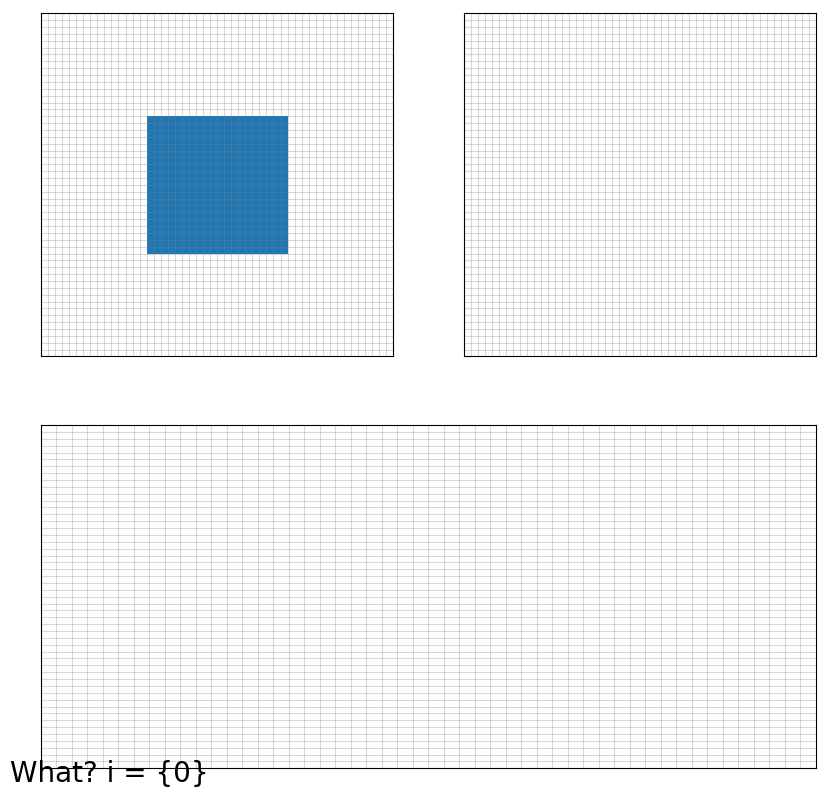

In [2]:
f = plt.figure()
f.set_dpi(100)
f.set_size_inches(10,10)

# Set up sub-plots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

# Prepare and pretty-up the graph.
for ax in (ax1, ax2, ax3):
    ax.grid(color=(.5, .5, .5), alpha=0.3)
    ax.set_xlim((0, 50))
    ax.set_ylim((0, 50))
    ax.set_xticks(np.arange(0, 50, 1))
    ax.set_yticks(np.arange(0, 50, 1))
    ax.tick_params(
        axis="both",
        bottom="off",
        left="off",
        labelbottom="off",
        labelleft="off"
    )

# Calculations for confusion matrix
true_mask = (15, 15, 20, 20) # x, y, width, height

# Set up any objects that will change.
rect = patches.Rectangle(xy=(-20, -20), width=10, height=10,
                        facecolor='none', edgecolor='black', linewidth=5)
ax1.add_patch(patches.Rectangle(
    xy=(true_mask[0], true_mask[1]),
    width=true_mask[2], height=true_mask[3]))
text_comment = ax3.text(-2, -2, r"What? i = {0}")
text_comment.set_fontsize(20)
                       
def init():
    ax1.add_patch(rect)
    return rect, text_comment
    
def animate(i):
    text_comment.set_position((5, 5))
    text_comment.set_text("Value is i = {0}".format(i))
    x, y = rect.xy
    x += 1
    y += 1
    rect.set_xy((x, y))
    return rect, text_comment

anim = FuncAnimation(f, animate,
                     init_func=init,
                     frames=100,
                     interval=200,
                     blit=True)


In [3]:
anim.save('animation.mp4', fps=30, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [4]:
from IPython.display import HTML

In [5]:
HTML("""
<video width="600" height="640" controls>
  <source src="animation.mp4" type="video/mp4">
</video>
""")

# Matplotlib Focused

In [1]:
import skimage
from importlib import reload
reload(skimage)
skimage.__version__

'0.13.1'

In [129]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
%matplotlib inline
import itertools
import skimage.draw as draw

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[[9600    0]
 [ 400    0]]
[[9600    0]
 [ 400    0]]


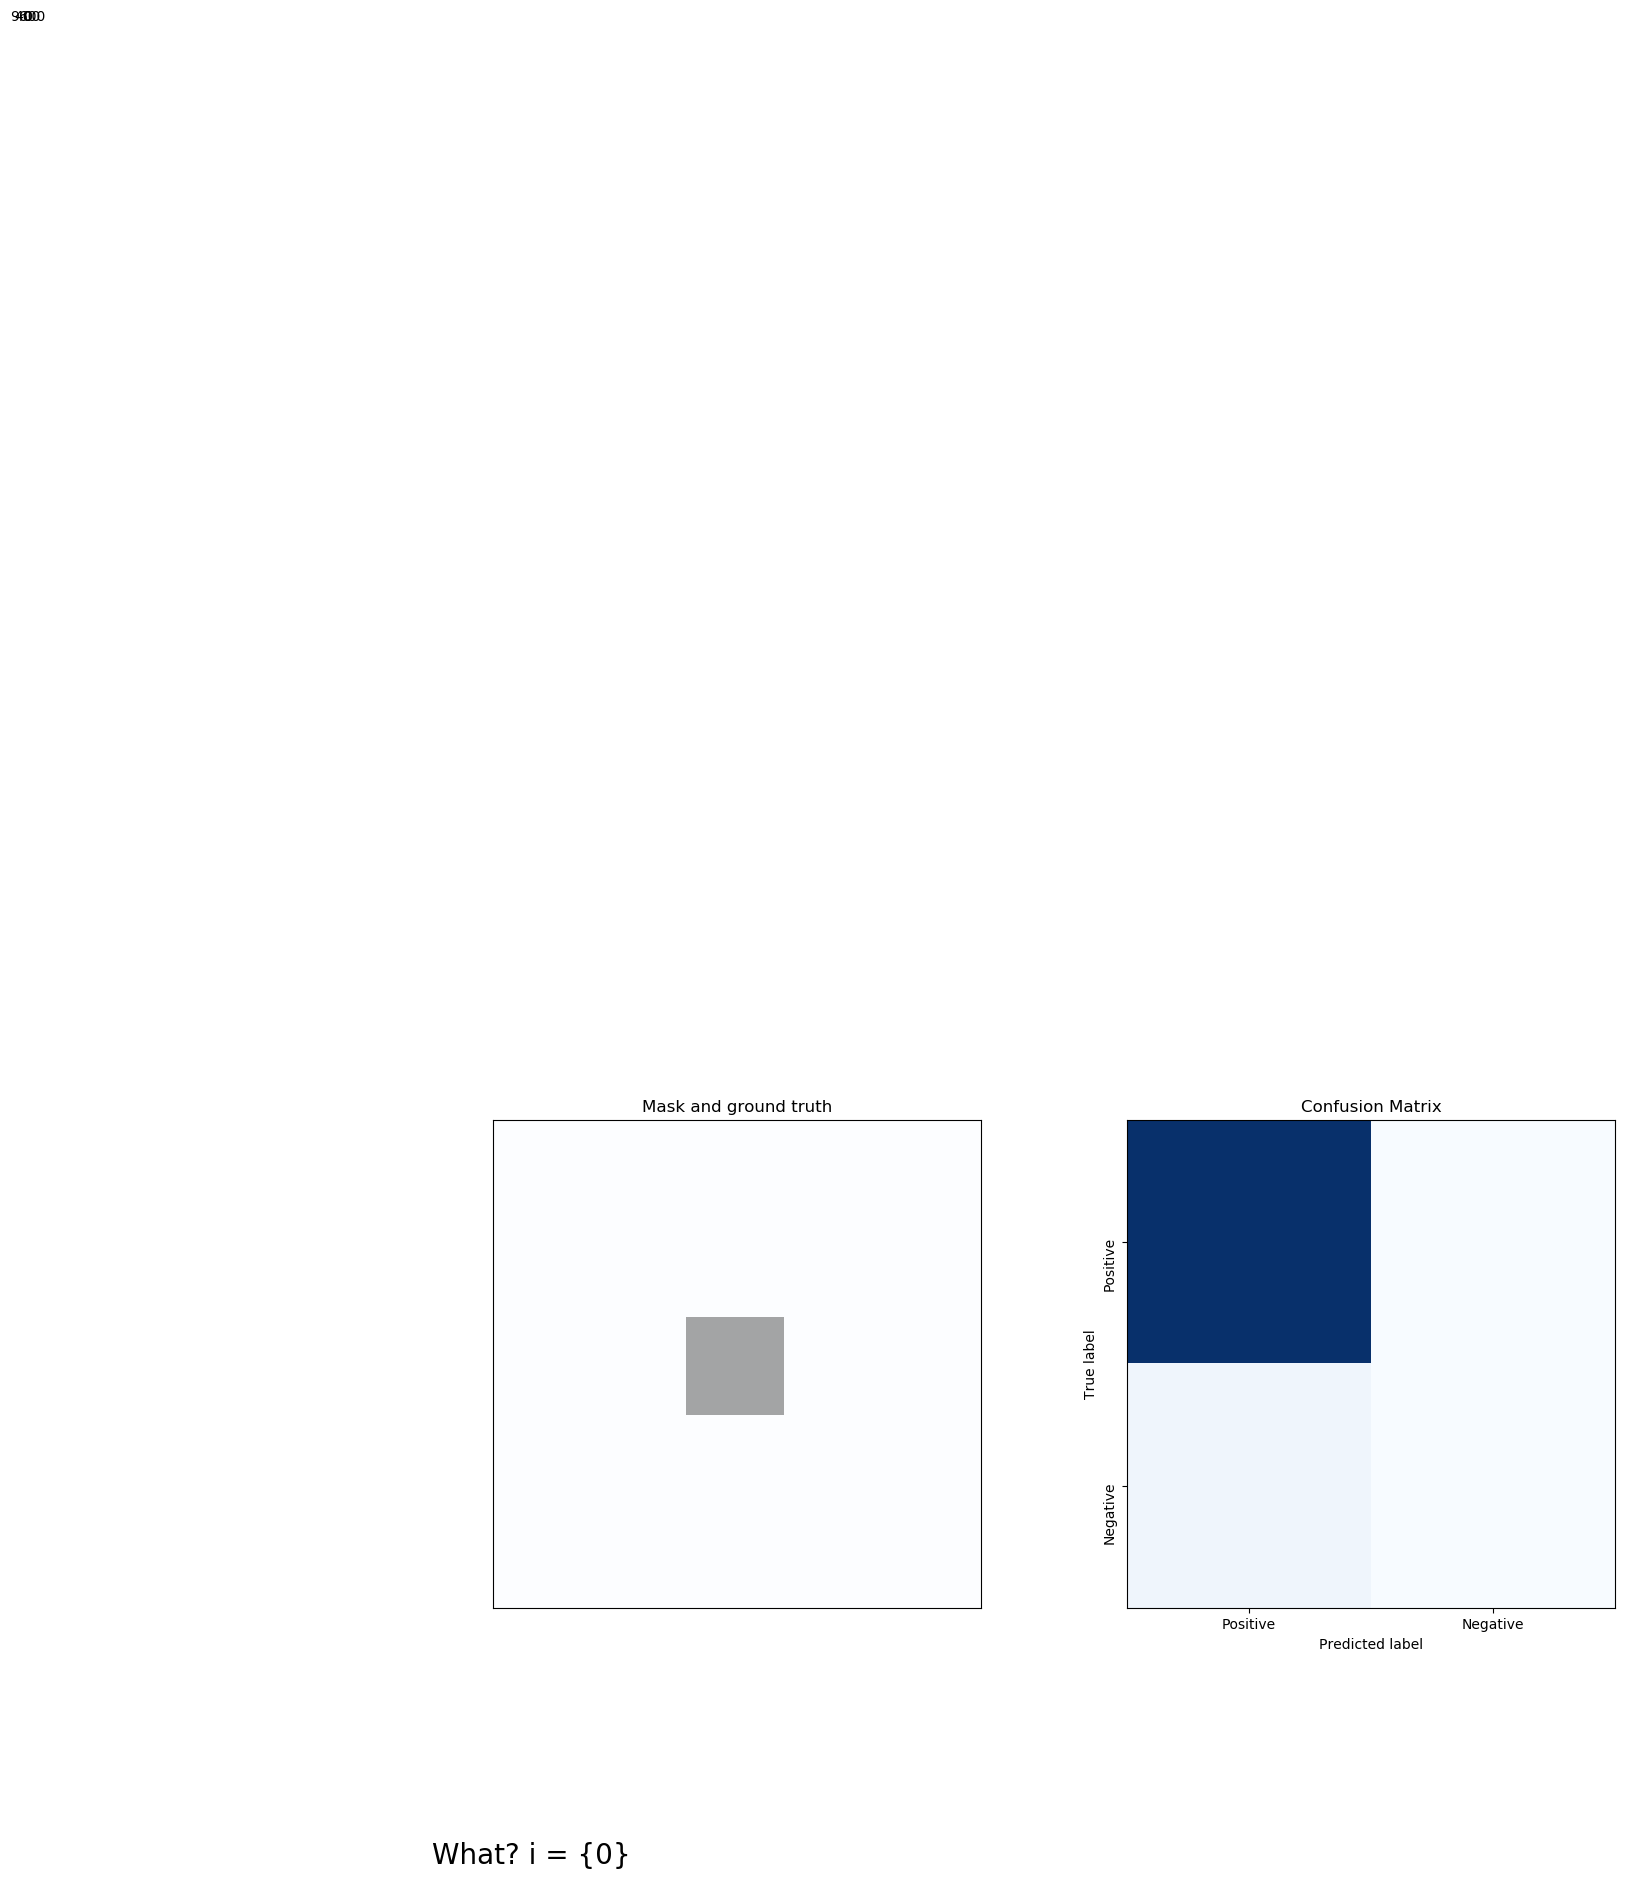

In [206]:
f = plt.figure()
f.set_dpi(100)
f.set_size_inches(15,10)

# Set up sub-plots
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 2), (0, 1), rowspan=2)
ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=2)

# Set up "iamge"ax1.grid(color=(.5, .5, .5), alpha=0.3)
ax1.set_xlim((0, 100))
ax1.set_ylim((0, 100))
ax1.set_xticks(np.arange(0.5, 100.5, 1))
ax1.set_yticks(np.arange(0.5, 100.5, 1))
ax1.tick_params(
    axis="both",
    bottom="off",
    left="off",
    labelbottom="off",
    labelleft="off"
)
ax1.set_title("Mask and ground truth")

# Set up confusion matrix
ax2.set_xticks(np.arange(2))
ax2.set_xticklabels(["Positive", "Negative"])
ax2.set_yticks(np.arange(2))
ax2.set_yticklabels(["Positive", "Negative"], rotation=90)
ax2.set_xlabel("Predicted label")
ax2.set_ylabel("True label")
ax2.invert_yaxis()
ax2.set_title("Confusion Matrix")

# Set up text box
ax3.set_xlim((0, 100))
ax3.set_ylim((0, 30))
ax3.set_xticks(np.arange(0.5, 100.5, 1))
ax3.set_yticks(np.arange(0.5, 100.5, 1))
ax3.tick_params(
    axis="both",
    bottom="off",
    left="off",
    labelbottom="off",
    labelleft="off"
)
ax3.set_axis_off()

# Set up our mask
width = 20
height = 20

# Calculations for confusion matrix

def invert_cm(cm):
    return cm
    #return np.array([[cm[1,1],cm[1,0]],[cm[0,0],cm[0,1]]])

y_pred = np.zeros((100, 100), dtype=np.uint8)
y = np.zeros((100, 100), dtype=np.uint8)
y[40:60, 40:60] = 1
cm = confusion_matrix(y.flatten(), y_pred.flatten())
print(cm)
cm = invert_cm(cm)
print(cm)

# Set up any objects that will change.
rect = patches.Rectangle(xy=(-20, -20), width=width, height=height,
                        facecolor='red', alpha=0.3, )
                         #edgecolor='black', linewidth=4)
y_im = ax1.imshow(y, cmap="Greys", alpha=0.5)
pred_im = ax1.imshow(y_pred, cmap="Blues", alpha=0.3, animated=True)
cf_im = ax2.imshow(cm, cmap="Blues", animated=True)

text_comment = ax3.text(5, 5, r"What? i = {0}",
                       horizontalalignment="center")
text_comment.set_fontsize(20)
thresh = cm.max() / 2.

def generate_cm_text(i, j):
    return ax2.text(-5, -5, format(cm[i, j], "d"),
              horizontalalignment="center",
              color="black")
              #color="white" if cm[i, j] > thresh else "black")

TP = generate_cm_text(1, 1)
FN = generate_cm_text(1, 0)
FP = generate_cm_text(0, 1)
TN = generate_cm_text(0, 0)       


def init():
    text_comment.set_position((50, 70))
    ax1.add_patch(rect)
    TP.set_position((0, 0))
    FN.set_position((0, 1))

    FP.set_position((1, 0))
    TN.set_position((1, 1))
    return rect, text_comment, y_im, cf_im, pred_im, TP, FN, FP, TN

In [207]:
polygon_location = []
for i in range(1, 41):
    polygon_location.append(((i, i), (i, height+i), (width+i, height+i), (width+i, i)))
for j in range(40):
    polygon_location.append(((i, i), (i, height+i), (width+i, height+i), (width+i, i)))
for i in range(1, 41):
    polygon_location.append(((40-i, 40-i), (40-1, height+40+i), (40+width+i, height+40+i), (40+width+i, 40-1)))
for j in range(40):
    polygon_location.append(((40-i, 40-i), (40-1, height+40+i), (40+width+i, height+40+i), (40+width+i, 40-1)))


In [208]:
polygon_location[40]

((40, 40), (40, 60), (60, 60), (60, 40))

In [209]:
def animate_accuracy(i):
    # Move the mask
    #polygon = [(0+i, 0+i), (0+i, height+i), (width+i, height+i), (width+i, 0+i)]
    polygon = polygon_location[i]
    
    y_true = np.zeros((100, 100), dtype=np.uint8)
    y_true[40:60, 40:60] = 1
    
    y_pred = np.zeros((100, 100), dtype=np.uint8)
    rr, cc = draw.polygon(
        (polygon[0][0], polygon[1][0], polygon[2][0], polygon[3][0]),
        (polygon[0][1], polygon[1][1], polygon[2][1], polygon[3][1]),
        shape=y_pred.shape
    )
    y_pred[rr, cc] = 1

    # Recalculate values
    cm = confusion_matrix(y_pred.flatten(), y_true.flatten())
    cm = invert_cm(cm)
    
    # Set new values
    x, y = rect.xy
    rect.set_xy(polygon[0])
    rect.set_width(abs(polygon[0][0] - polygon[2][0]))
    rect.set_height(abs(polygon[0][1] - polygon[2][1]))
    
    pred_im.set_array(y_pred)
    cf_im.set_array(cm)
    TP.set_text(cm[0, 0])
    FN.set_text(cm[0, 1])
    FP.set_text(cm[1, 0])
    TN.set_text(cm[1, 1])
    
    text_comment.set_text(r"Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$ = " + "{:.2f}".format(
        accuracy_score(y_true.flatten(), y_pred.flatten())))
    
    return rect, text_comment, y_im, cf_im, pred_im, TP, FN, FP, TN

In [210]:
anim = FuncAnimation(f, animate_accuracy,
                     init_func=init,
                     frames=len(polygon_location),
                    )
anim.save('accuracy.mp4', fps=20, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [165]:
def animate_recall(i):
    # Move the mask
    polygon = polygon_location[i]
    
    y_true = np.zeros((100, 100), dtype=np.uint8)
    y_true[40:60, 40:60] = 1
    
    y_pred = np.zeros((100, 100), dtype=np.uint8)
    rr, cc = draw.polygon(
        (polygon[0][0], polygon[1][0], polygon[2][0], polygon[3][0]),
        (polygon[0][1], polygon[1][1], polygon[2][1], polygon[3][1]),
        shape=y_pred.shape
    )
    y_pred[rr, cc] = 1

    # Recalculate values
    cm = confusion_matrix(y_pred.flatten(), y_true.flatten())
    cm = invert_cm(cm)
    
    # Set new values
    x, y = rect.xy
    rect.set_xy(polygon[0])
    rect.set_width(abs(polygon[0][0] - polygon[2][0]))
    rect.set_height(abs(polygon[0][1] - polygon[2][1]))
    
    pred_im.set_array(y_pred)
    cf_im.set_array(cm)

    TP.set_text(cm[0, 0])
    FN.set_text(cm[0, 1])
    FP.set_text(cm[1, 0])
    TN.set_text(cm[1, 1])
    
    text_comment.set_text(r"Recall = $\frac{TP}{TP+FN}$ = " + "{:.2f}".format(
        recall_score(y_true.flatten(), y_pred.flatten())))
    
    return rect, text_comment, y_im, cf_im, pred_im, TP, FN, FP, TN

In [134]:
def animate_precision(i):
    # Move the mask
    polygon = polygon_location[i]
    
    y_true = np.zeros((100, 100), dtype=np.uint8)
    y_true[40:60, 40:60] = 1
    
    y_pred = np.zeros((100, 100), dtype=np.uint8)
    rr, cc = draw.polygon(
        (polygon[0][0], polygon[1][0], polygon[2][0], polygon[3][0]),
        (polygon[0][1], polygon[1][1], polygon[2][1], polygon[3][1]),
        shape=y_pred.shape
    )
    y_pred[rr, cc] = 1

    # Recalculate values
    cm = confusion_matrix(y_pred.flatten(), y_true.flatten())
    cm = invert_cm(cm)
    
    # Set new values
    x, y = rect.xy
    rect.set_xy(polygon[0])
    rect.set_width(abs(polygon[0][0] - polygon[2][0]))
    rect.set_height(abs(polygon[0][1] - polygon[2][1]))
    
    pred_im.set_array(y_pred)
    cf_im.set_array(cm)

    TP.set_text(cm[0, 0])
    FN.set_text(cm[0, 1])
    FP.set_text(cm[1, 0])
    TN.set_text(cm[1, 1])
    
    text_comment.set_text(r"Precision = $\frac{TP}{TP+FP}$ = " + "{:.2f}".format(
        precision_score(y_true.flatten(), y_pred.flatten())))
    
    return rect, text_comment, y_im, cf_im, pred_im, TP, FN, FP, TN

In [138]:
def animate_f1(i):
    # Move the mask
    polygon = polygon_location[i]
    
    y_true = np.zeros((100, 100), dtype=np.uint8)
    y_true[40:60, 40:60] = 1
    
    y_pred = np.zeros((100, 100), dtype=np.uint8)
    rr, cc = draw.polygon(
        (polygon[0][0], polygon[1][0], polygon[2][0], polygon[3][0]),
        (polygon[0][1], polygon[1][1], polygon[2][1], polygon[3][1]),
        shape=y_pred.shape
    )
    y_pred[rr, cc] = 1

    # Recalculate values
    cm = confusion_matrix(y_pred.flatten(), y_true.flatten())
    cm = invert_cm(cm)
    
    # Set new values
    x, y = rect.xy
    rect.set_xy(polygon[0])
    rect.set_width(abs(polygon[0][0] - polygon[2][0]))
    rect.set_height(abs(polygon[0][1] - polygon[2][1]))
    
    pred_im.set_array(y_pred)
    cf_im.set_array(cm)

    TP.set_text(cm[0, 0])
    FN.set_text(cm[0, 1])
    FP.set_text(cm[1, 0])
    TN.set_text(cm[1, 1])
    
    text_comment.set_text(r"F1 Score = $\frac{TP}{TP+FP+FP}$ = " + "{:.2f}".format(
        f1_score(y_true.flatten(), y_pred.flatten())))
    
    return rect, text_comment, y_im, cf_im, pred_im, TP, FN, FP, TN

In [136]:
anim = FuncAnimation(f, animate_precision,
                     init_func=init,
                     frames=80,
                    )
anim.save('precision.mp4', fps=20, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [137]:
anim = FuncAnimation(f, animate_recall,
                     init_func=init,
                     frames=80,
                    )
anim.save('recall.mp4', fps=20, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [141]:
anim = FuncAnimation(f, animate_f1,
                     init_func=init,
                     frames=80,
                    )
anim.save('f1.mp4', fps=20, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [116]:
anim.save('animation.mp4', fps=20, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [117]:
from IPython.display import HTML

In [118]:
HTML("""
<video width="600" height="640" controls>
  <source src="animation.mp4" type="video/mp4">
</video>
""")

# Stolen examples

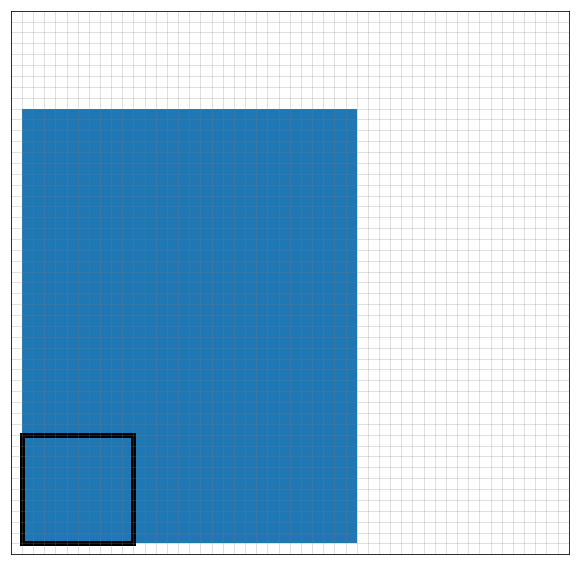

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(xlim=(0, 50), ylim=(0, 50))
ax.set_xticks(np.arange(0, 50, 1))
ax.set_yticks(np.arange(0, 50, 1))
ax.tick_params(
    axis="both",
    bottom="off",
    left="off",
    labelbottom="off",
    labelleft="off"
)

ax.grid(color=(.5, .5, .5), alpha=0.3)

ax.add_patch(patches.Rectangle(xy=(1, 1), width=30, height=40))
rect = patches.Rectangle(xy=(1,1), width=10, height=10,
                        facecolor='none', edgecolor='black', linewidth=5)
ax.add_patch(rect)

def animate(i)
    ax.remove()

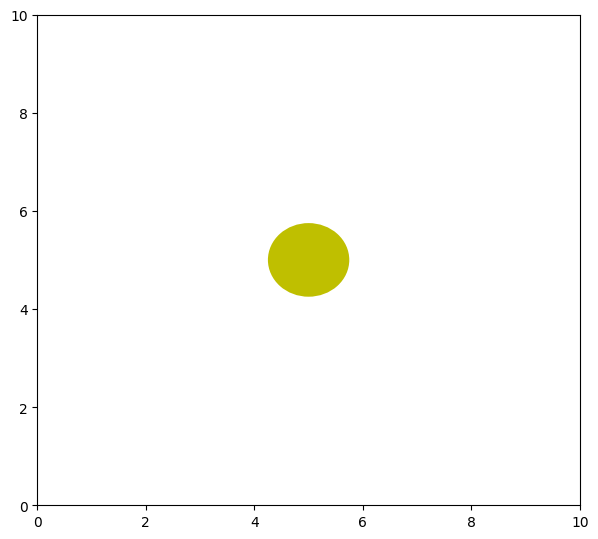

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (x, y)
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=20,
                               blit=True)

plt.show()

In [15]:
anim.save('animation.mp4', fps=30, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])

In [17]:
from IPython.display import HTML

In [22]:
HTML("""
<video width="600" height="640" controls>
  <source src="animation.mp4" type="video/mp4">
</video>
""")